<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>BERT, RoBERTa, XLNet, Sentence-BERT, BETO, ERNIE, ...</center></span>

<center>Entendiendo Modelos BERT y sus variaciones</center>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Asistentes</span>



- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. [Devlin et. al., BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/pdf/1810.04805.pdf), mayo 2019.
1. [Liu et al., RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/pdf/1907.11692.pdf), julio 2019
1. [Yang et al., XLNet: Generalized Autoregressive Pretraining
for Language Understanding](https://arxiv.org/pdf/1906.08237.pdf), enero 2020.
1. [ERNIE: Enhanced Language Representation with Informative Entities](https://arxiv.org/pdf/1905.07129.pdf), junio 2019
1. [GLUE Score](https://openreview.net/pdf?id=rJ4km2R5t7), 2019
1. [SUPERGLUE Score](https://arxiv.org/pdf/1905.00537.pdf), febrero 2020
1. [Aprendizaje Profundo-Diplomado](https://github.com/AprendizajeProfundo/Diplomado)
1. [Aprendizaje Profundo-PLN](https://github.com/AprendizajeProfundo/PLN)
1. [Ashish Vaswani et al.,   Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), diciembre 2017.
1. [Dennis Rothman, Transformers for Natural Language processing](http://libgen.rs/search.php?req=Transformers+for+Natural+Language+processing&open=0&res=25&view=simple&phrase=1&column=def), enero 2021.
1.[ Varios,  Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

* [Cómo usar BERT](#Cómo-usar-BERT)
* [GLUE Score](#GLUE-Score)
    * [CoLA](#CoLA)
    * [SST-2](#SST-2)
    * [MRPC](#MRPC)
    * [SST-B](#SST-B)
    * [QQP](#QQP)
    * [MNLI-m](#MNLI-m)
    * [MNLI-mm](#MNLI-mm)
    * [QNLI](#QNLI)
    * [RTE](#RTE)
    * [WNLI](#WNLI)
    * [AX](#AX)
* [SUPERGLUE Score](#SUPERGLUE-Score)
* [Variaciones Principales de BERT](#Variaciones-Principales-de-BERT)
* [Sentence-BERT](#Sentence-BERT)
* [ERNIE](#ERNIE)

## <span style="color:blue">¿Cómo usar BERT?</span>


<figure>
<center>
<img src="../Imagenes/BERT-EL-NUEVO-ALGORITMO-DE-GOOGLE.jpg" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">BERT-Transformer</p>
</figcaption>
</figure>

Fuente:[Bert el nuevo algoritmo de Google](https://blog.sinapsis.agency/bert-el-nuevo-algoritmo-de-google/)

Ahora que hemos visto el funcionamiento teórico de BERT, es hora de ponernos a usarlo para diferentes tareas.

Lo primero que haremos es tratar de entender el input que espera BERT y los outputs que genera.

Para lo que sigue, usaremos **HuggingFace** para cargar nuestros modelos.

In [6]:
# Cada Modelo tiene su propio Tokenizador
from transformers import BertModel, BertTokenizer

### <span style="color:blue">Tokenizador de BERT</span>

In [7]:
# Instanciar Tokenizador
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

In [101]:
# Texto de ejemplo
ejemplo = 'Voy a comer papitas en la noche con mi gata.'

# Input de BERT
bert_input = tokenizer(ejemplo, return_tensors="pt")
# Cortando y usando padding
#bert_input = tokenizer(ejemplo, padding='max_length', max_length = 20, truncation=True, return_tensors="pt")
# Salidas del tokenizador
print("\nOutput del tokenizador:\n\n",bert_input)


Output del tokenizador:

 {'input_ids': tensor([[   4, 1705, 1012, 1987, 8228, 1204, 1035, 1032, 1947, 1048, 1136, 2734,
         1047, 1008,    5]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [102]:
# Observar ids de los tokens
print('Tokens Ids:')
print(bert_input.input_ids)

Tokens Ids:
tensor([[   4, 1705, 1012, 1987, 8228, 1204, 1035, 1032, 1947, 1048, 1136, 2734,
         1047, 1008,    5]])


In [177]:
# Decodificar token ids
decodificado = tokenizer.decode(bert_input.input_ids[0])
# decodificado = tokenizer.decode(bert_input.input_ids[0],skip_special_tokens=True)
print(decodificado)

[CLS] voy a comer papitas en la noche con mi gata. [SEP]
['[CLS] voy a comer papitas en la noche con mi gata. [SEP]']


Como podemos notar, hay una diferencia entre el número de palabras y el número de tokens.

In [138]:
# Número de Palabras en la frase
print("\nNúmero de Palabras:",len(ejemplo.split()))
# Número de tokens (incluye [CLS] y [SEP])
print("Número de Tokens  :",len(bert_input.input_ids[0]))


Número de Palabras: 10
Número de Tokens  : 15


Observemos cómo se realiza la tokenización a nivel interno:

In [179]:
# Verdadera Tokenización
tokens = tokenizer.tokenize(ejemplo)
print(tokens)
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

['voy', 'a', 'comer', 'papi', '##tas', 'en', 'la', 'noche', 'con', 'mi', 'ga', '##ta', '.']
['[CLS]', 'voy', 'a', 'comer', 'papi', '##tas', 'en', 'la', 'noche', 'con', 'mi', 'ga', '##ta', '.', '[SEP]']


Además de los tokens especiales, que son

In [106]:
# Tokens especiales
print(sorted(tokenizer.all_special_ids),tokenizer.convert_ids_to_tokens(sorted(tokenizer.all_special_ids)))

[0, 1, 3, 4, 5] ['[MASK]', '[PAD]', '[UNK]', '[CLS]', '[SEP]']


BERT cuenta con un vocabulario no tan grande, comparado con una tokenización enteramente por palabras.

In [107]:
print(len(tokenizer.get_vocab()))

31002


### <span style="color:blue">Output de BERT</span>

In [108]:
model = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dens

In [109]:
x = model(bert_input['input_ids'],bert_input['attention_mask'])
#x
#x.last_hidden_state
#x.pooler_output

model regresa una lista con dos objetos: 

* El primer valor, *last_hidden_state*, contiene la representación de todos los tokens obtenidos solo de la capa del codificador final (codificador 12).
* A continuación, *pooler_output* indica la representación del token [CLS] de la capa codificadora final, que se procesa posteriormente mediante una capa lineal y una activación *tanh*. La capa lineal es entrenada cuando se entrena el modelo BERT para la tarea NSP (Next sequence prediction).


In [149]:
embeddings_c12, pooler = model(bert_input['input_ids'],bert_input['attention_mask'],return_dict=False)

In [150]:
# Mostrar embedding por tokens (15 tokens)
print(embeddings_c12)
# Tamaño del embedding (batch,tokens,dimensión del embedding)
print("\nTamaño del Embedding:",embeddings_c12.shape)

tensor([[[ 0.1484, -0.3802,  0.0250,  ..., -1.0641,  0.6994, -0.7393],
         [-0.3931, -0.1181,  0.0966,  ..., -0.9495,  0.7772, -0.7068],
         [-0.0809, -0.2313,  0.6576,  ..., -0.3303,  0.8048, -1.3535],
         ...,
         [ 0.4387, -0.5332, -0.6894,  ..., -0.6974,  0.7406, -0.6476],
         [ 0.0772, -0.5173, -0.2054,  ..., -0.9474,  0.7835, -0.3945],
         [-0.0945, -0.3754, -0.1654,  ..., -0.8822,  0.9774, -0.7301]]],
       grad_fn=<NativeLayerNormBackward0>)

Tamaño del Embedding: torch.Size([1, 15, 768])


In [151]:
# Ejemplo de Embedding
print(f'{ejemplo.split()[0]} ----> {embeddings_c12[0,1,:5].detach()}...')

Voy ----> tensor([-0.3931, -0.1181,  0.0966,  0.2925, -0.3660])...


In [152]:
# Tamaño del pooler
print("\nTamaño del Pooler:",pooler.shape)


Tamaño del Pooler: torch.Size([1, 768])


### <span style="color:blue">Extracción de los incrustamientos de todas las capas codificadoras</span>

En esta sección revisamos como extraer las incrustaciones (embeddings) que salen de cada una de las capas codificadoras (12 por ejemplo en el modelo base). Algunos veces esto se hace para extraer diferentes features de las sentencias. 

Por ejemplo en la tarea NER (name entity recognition) los investigadores han usado las incrustaciones de las diferentes capas, para hacer promedios pesados de algunas de ellas y con esto han podido mejorar la exactitud en la precisión.

Para hacer esto, es necesario instanciar el modelo preentrenado con la opción *output_hidden_states=True*:

In [153]:
model = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased', output_hidden_states=True)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dens

In [162]:
out = model(bert_input['input_ids'],bert_input['attention_mask'])

last_hidden_state, pooler_output, hidden_states = out.last_hidden_state, out.pooler_output, out.hidden_states

In [157]:
print(last_hidden_state.shape)
print(pooler_output.shape)
print(len(hidden_states)) # esta es una lista conteniendo las incrustaciones de todas las capas codificadoras

torch.Size([1, 15, 768])
torch.Size([1, 768])
13


Observe que *hidden_states* tiene 13 elementos. La capa 0 corresponde a la incrustación de la capa de entrada, luego los elementos 1 a 12 corresponden a las incrustaciones de salida de cada una de las 12 capas codificadoras.

Las incrustaciones de cada capa *i*, se obtienen mediante *hidden_states[i]:

In [ ]:
# hidden_states[0]

### <span style="color:blue">Recuperando los pesos de atención</span>

Los pesos de  atención después de la atención softmax, se utilizan para calcular el promedio ponderado en las cabezas de  autoatención. 
Son obtenidos pasando al modelo *output_attentions=True*

+ *output attention* es una tupla. Cada elemento coresponde a los pesos de atención de cada capa codificadora.

In [163]:
model = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased',output_hidden_states=True, output_attentions=True)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dens

In [165]:
out = model(bert_input['input_ids'],bert_input['attention_mask'])

last_hidden_state, pooler_output, hidden_states, attentions = \
        out.last_hidden_state, out.pooler_output, out.hidden_states, \
        out.attentions
print(len(attentions))

12


In [21]:
print(attentions[11].shape)

torch.Size([1, 12, 7, 7])


La salida se explica así:

- El tamaño del batch es 1. Una sentencia.
- Son 12 cabezas de atención.
- La sentencia viene de tamaño 7.

Por lo tanto tenemos la salida de las 12 cabezas de atención para la sentencia.

Vamos a darle una mirada a los pesos de atención de la última capa codificadora



In [168]:
attention11 = attentions[11].squeeze()#elimina la dimensión de batch.

In [169]:
attention11.shape

torch.Size([12, 15, 15])

### <span style="color:blue">Función para graficar pesos de atención de una cabeza</span>

In [166]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# versión con decode utf-8
def plot_attention_head_cp(in_tokens, translated_tokens, attention):
  # The plot is of the attention when a token was generated.
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)



def plot_attention_head(in_tokens, translated_tokens, attention):
  # The plot is of the attention when a token was generated.
  # The model didn't generate `<START>` in the output. Skip it.
  #translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  pcm = ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label for label in in_tokens]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label for label in translated_tokens]
  ax.set_yticklabels(labels)
  
 

In [170]:
head = attention11[0]
head.shape

torch.Size([15, 15])

In [171]:
head = head.detach().numpy()

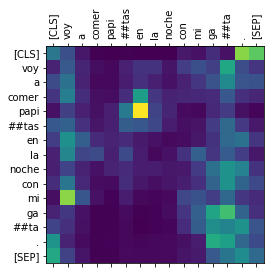

In [180]:
plot_attention_head(in_tokens=tokens, translated_tokens=tokens, attention=head)

### <span style="color:blue">Visualizando los pesos de todas las cabezas de atención</span>

In [185]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = sentence
  #in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
  #in_tokens = tokenizers.pt.lookup(in_tokens)[0]
  #in_tokens

  fig = plt.figure(figsize=(20, 20))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(3, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

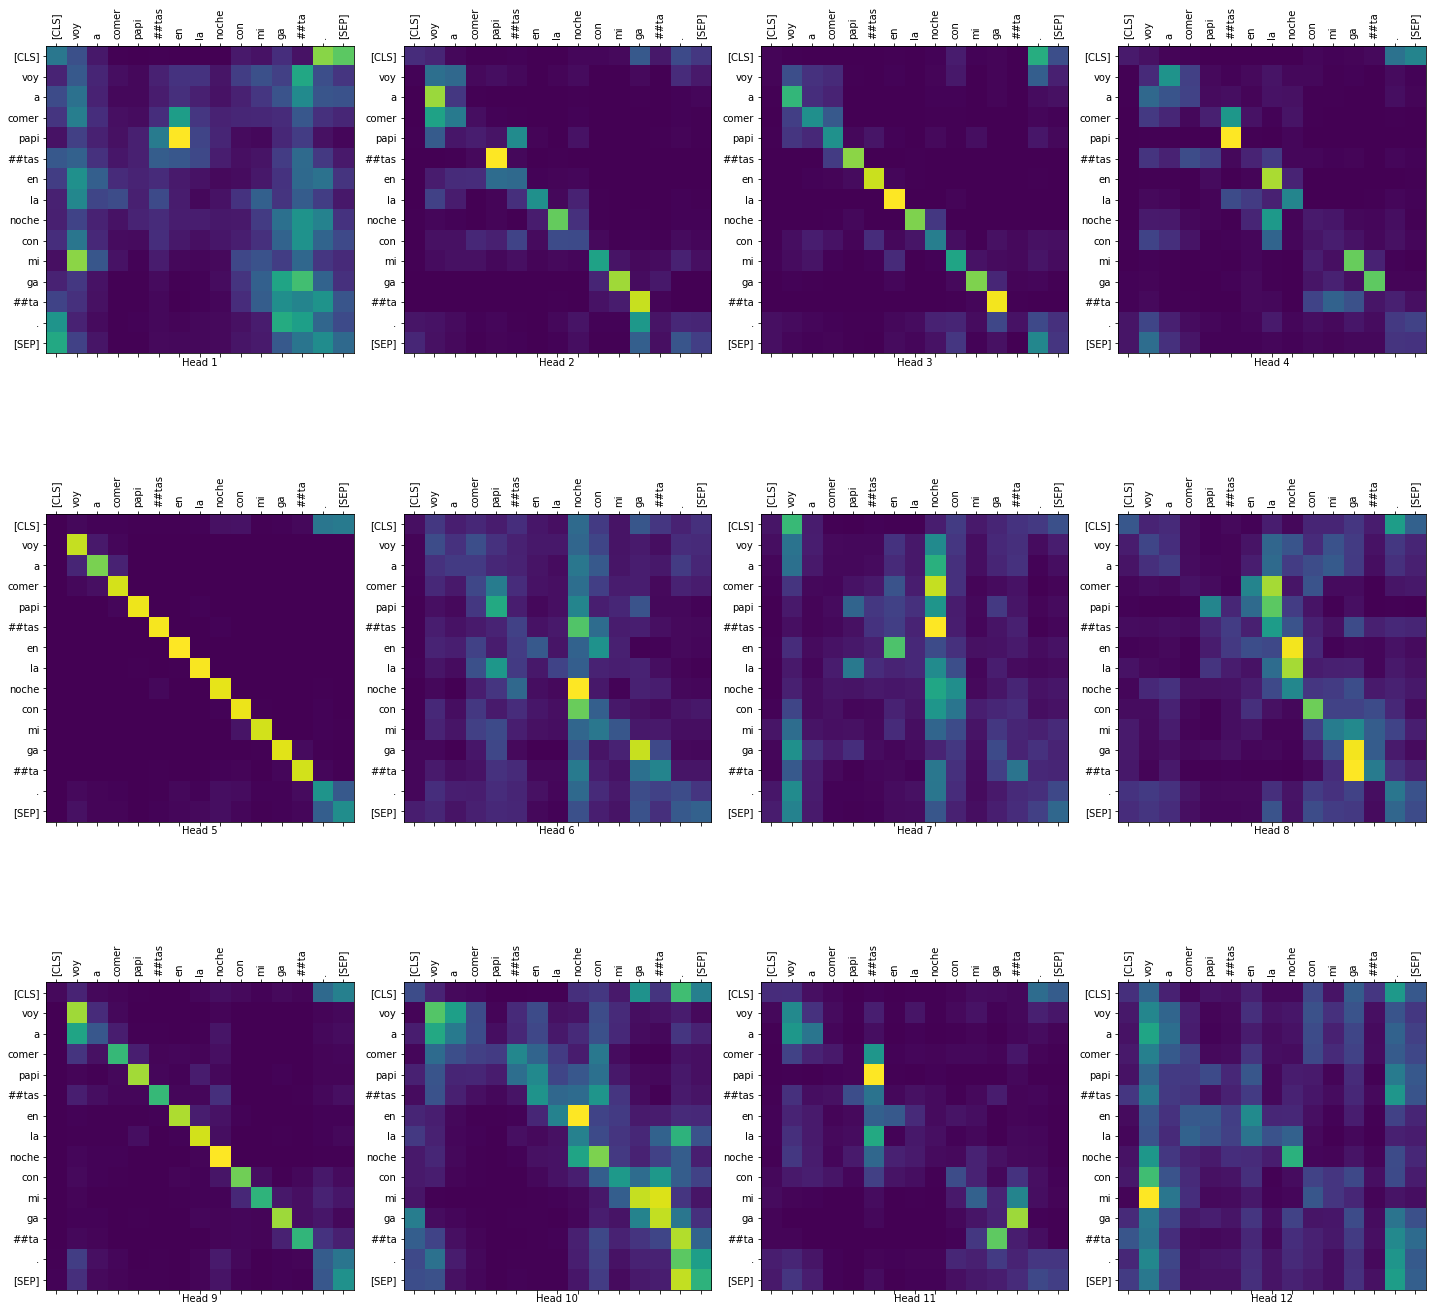

In [186]:
heads = attention11.detach().numpy()

plot_attention_weights(sentence=tokens, translated_tokens=tokens, 
                      attention_heads=heads)

[[Volver al inicio]](#Contenido)

## <span style="color:blue">GLUE Score</span>

El procesamiento de Lenguaje Natural (PLN), ha crecido tanto en los últimos años, que ahora se cambia el paradigma sobre las tareas que se deben responder en modelos de lenguaje. Ya no se habla propiamente de PLN, sino de CLN (Comprensión del Lenguaje Natural, NLU).

Cabe resaltar algunas diferencias:

El **PLN** busca:

- Procesar grandes cantidades de datos de lenguaje natural.
- Obtener percepciones e información sobre los datos.

Pero para que esto ocurra, se debe estandarizar el texto para analizarlo (por ejemplo, procesándolo, quitando palabras vacías, etc...)

El **NLU** busca, por otro lado:

- Interpretar el lenguaje natural.
- Derivar significado.
- Identificar el contexto.

Para amyor información, se puede leer por ejemplo [NLP vs NLU: What’s The Difference?](https://www.bmc.com/blogs/nlu-vs-nlp-natural-language-understanding-processing/).

Como los modelos como BERT son tan útiles para responder a diferentes tareas (todo gracias al **Transfer Learning**), se hace necesario crear alguna especie de métrica que pueda evaluar la capacidad de estos modelos en poder desempeñarse en dichas tareas.

Es por esto que con ayuda de varios científicos reconocidos (algunos parte de DeepMind), han creado el Score **GLUE**, para evaluación de modelos del estado del arte (SOTA).

En palabras del propio paper:

*"Para que la tecnología de comprensión del lenguaje natural (NLU) sea de máxima utilidad, debe ser capaz de procesar el lenguaje de una manera que no sea exclusiva de una sola tarea, género o conjunto de datos. En pos de este objetivo, presentamos la Evaluación comparativa de comprensión del Lenguaje (GLUE), una colección de herramientas para evaluar el rendimiento de los modelos en un conjunto diverso de tareas NLU existentes. Por Incluyendo tareas con datos de entrenamiento limitados, GLUE está diseñado para favorecer y fomentar modelos que comparten conocimientos lingüísticos generales entre tareas... El bajo rendimiento absoluto de nuestro mejor modelo indica la necesidad de sistemas NLU generales mejorados."*

En la siguiente tabla se puede observar las estadísticas de los conjuntos de datos asociados a **GLUE**:

![GLUE](../Imagenes/GLUE.png)

## <span style="color:blue">Tareas de una sola Frase</span>

### <span style="color:blue">CoLA</span>

El Corpus de Aceptabilidad Lingüística (CoLA) en su forma completa consta de 10657 oraciones de 23 publicaciones lingüísticas, anotadas por expertos para la aceptabilidad (gramaticalidad) por sus autores originales. La versión pública proporcionada aquí contiene 9594 oraciones que pertenecen a conjuntos de entrenamiento y desarrollo, y excluye 1063 oraciones que pertenecen a un conjunto de prueba retenido.

El paper del dataset puede ser leído en [Neural Network Acceptability Judgments](https://arxiv.org/pdf/1805.12471.pdf), por Alex Warstadt et al. para mayor información.

El dataset puede ser descargado desde la página de GLUE o directamente desde la página origen de [CoLA](https://nyu-mll.github.io/CoLA/).

Veamos en qué consisten los datos:

In [192]:
import pandas as pd

CoLA_train = pd.read_csv('../Datos/CoLA/train.tsv',sep='\t',header=None)
CoLA_dev = pd.read_csv('../Datos/CoLA/dev.tsv',sep='\t',header=None)
CoLA_train

,0,1,2,3
0,gj04,1,NaN,"Our friends won't buy this analysis, let alone..."
1,gj04,1,NaN,One more pseudo generalization and I'm giving up.
2,gj04,1,NaN,One more pseudo generalization or I'm giving up.
3,gj04,1,NaN,"The more we study verbs, the crazier they get."
4,gj04,1,NaN,Day by day the facts are getting murkier.
...,...,...,...,...
8546,ad03,0,*,Poseidon appears to own a dragon
8547,ad03,0,*,Digitize is my happiest memory
8548,ad03,1,NaN,It is easy to slay the Gorgon.
8549,ad03,1,NaN,I had the strangest feeling that I knew you.


Formato de datos:

Cada línea en los archivos .tsv consta de 4 columnas separadas por tabuladores.

- Columna 1: el código que representa la fuente de la oración.
- Columna 2: la etiqueta del juicio de aceptabilidad (0=inaceptable, 1=aceptable).
- Columna 3: el juicio de aceptabilidad tal como lo anotó originalmente el autor.
- Columna 4: la oración.

Cabe notar, que en el GLUE, en esta tarea en particular, la precisión de los modelos no basta; se hace necesario calcular la Correlación de Matthews, pues se trata de un problema de clasificación binaria desbalanceado.

Una buena introducción a esta métrica se puede encontrar en [Matthews Correlation Coefficient is The Best Classification Metric You’ve Never Heard Of](https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a).

[[Volver al inicio]](#Contenido)

### <span style="color:blue">SST-2</span>

Stanford Sentiment Treebank es un corpus con árboles de análisis sintáctico completamente etiquetados que permite un análisis completo de los efectos de composición del sentimiento en el lenguaje. El corpus se basa en el conjunto de datos presentado por Pang y Lee (2005) y consta de 11.855 oraciones individuales extraídas de reseñas de películas. Se analizó con el analizador de Stanford e incluye un total de 215.154 frases únicas de esos árboles de análisis, cada una anotada por 3 jueces humanos.

Cada frase está etiquetada como negativa, algo negativa, neutral, algo positiva o positiva. El corpus con las 5 etiquetas se denomina SST-5 o SST de grano fino. Los experimentos de clasificación binaria en oraciones completas (negativas o algo negativas versus algo positivas o positivas con oraciones neutras descartadas) se refieren al conjunto de datos como SST-2 o SST binario.

El paper del dataset puede ser leído en [Recursive Deep Models for Semantic Compositionality
Over a Sentiment Treebank](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf), por Richard Socher et al. para mayor información.

El dataset puede ser descargado desde la página de GLUE o directamente desde la página origen de [Sentiment Analysis](https://nlp.stanford.edu/sentiment/) de la Universidad de Standford.

Veamos en qué consisten los datos:

In [194]:
import pandas as pd

SST2_train = pd.read_csv('../Datos/SST-2/train.tsv',sep='\t')
SST2_train

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0
...,...,...
67344,a delightful comedy,1
67345,"anguish , anger and frustration",0
67346,"at achieving the modest , crowd-pleasing goals...",1
67347,a patient viewer,1


En esta tarea, basta con el accuracy del modelo (precisión).

[[Volver al inicio]](#Contenido)

## <span style="color:blue">Tareas de Similaridad entre Frases</span>

### <span style="color:blue">MRPC</span>

Microsoft Research Paraphrase Corpus (Dolan & Brockett, 2005) es un corpus de pares de oraciones extraídos automáticamente de fuentes de noticias en línea, con anotaciones humanas para determinar si las oraciones en el par son semánticamente equivalentes. Porque las clases están desequilibradas (68% positivo), seguimos la práctica común e informamos tanto la precisión como la puntuación F1.

Para usuarios Mac/Linux no es trivial la lectura del dataset, por lo cual se recomienda leer esta referencia para poder leerlo de manera adecuada: [Script for downloading all GLUE data](https://github.com/nyu-mll/GLUE-baselines/blob/master/download_glue_data.py)

Veamos en qué consisten los datos:

In [213]:
import pandas as pd

MRPC = pd.read_csv('../Datos/MRPC/msr_paraphrase_test.txt',sep='\t+',engine='python')
MRPC

,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, ...",Current Chief Operating Officer Mike Butcher a...
1,1,3019446,3019327,The world's two largest automakers said their ...,Domestic sales at both GM and No. 2 Ford Motor...
2,1,1945605,1945824,According to the federal Centers for Disease C...,The Centers for Disease Control and Prevention...
3,0,1430402,1430329,A tropical storm rapidly developed in the Gulf...,A tropical storm rapidly developed in the Gulf...
4,0,3354381,3354396,The company didn't detail the costs of the rep...,But company officials expect the costs of the ...
...,...,...,...,...,...
1720,0,2685984,2686122,"After Hughes refused to rehire Hernandez, he c...",Hernandez filed an Equal Employment Opportunit...
1721,0,339215,339172,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...
1722,0,2996850,2996734,Bethany Hamilton remained in stable condition ...,"Bethany, who remained in stable condition afte..."
1723,1,2095781,2095812,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE..."


[[Volver al inicio]](#Contenido)

### <span style="color:blue">SST-B</span>

Creado por Cer et al. en 2017, en el Semantic Textual Similarity Benchmark, la tarea es predecir la similitud textual entre pares de oraciones, en idioma inglés. 

Contiene 8.628 en formato de archivo CSV.

Referencias sobre su construcción puede ser encontrado en [SemEval-2017 Task 1: Semantic Textual Similarity
Multilingual and Cross-lingual Focused Evaluation](https://arxiv.org/pdf/1708.00055.pdf).

Veamos en qué consisten los datos:

In [215]:
import pandas as pd

MRPC = pd.read_csv('../Datos/STS-B/train.tsv',sep='\t+',engine='python',index_col=0)
MRPC

,genre,filename,year,old_index,source1,source2,sentence1,sentence2,score
index,,,,,,,,,
0,main-captions,MSRvid,2012test,1,none,none,A plane is taking off.,An air plane is taking off.,5.00
1,main-captions,MSRvid,2012test,4,none,none,A man is playing a large flute.,A man is playing a flute.,3.80
2,main-captions,MSRvid,2012test,5,none,none,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,main-captions,MSRvid,2012test,6,none,none,Three men are playing chess.,Two men are playing chess.,2.60
4,main-captions,MSRvid,2012test,9,none,none,A man is playing the cello.,A man seated is playing the cello.,4.25
...,...,...,...,...,...,...,...,...,...
5744,main-news,headlines,2016,1456,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu),Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia,0.00
5745,main-news,headlines,2016,1465,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu),Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...,0.00
5746,main-news,headlines,2016,1466,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu),President heading to Bahrain,President Xi: China to continue help to fight ...,0.00


Notemos que la tarea de este dataset no es de clasificación, sino de **regresión**.

Por esto, las métricas usadas para su evaluación son las correlaciones de Pearson/Spearman.

[[Volver al inicio]](#Contenido)

### <span style="color:blue">QQP</span>

El conjunto de datos de pares de preguntas de Quora (QQP) consta de más de 400.000 pares de preguntas.

Cada par de preguntas se anota con un valor binario que indica si las dos preguntas se parafrasean entre sí. 

Referencias sobre su construcción puede ser encontrado en [First Quora Dataset Release: Question Pairs](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs.)

Veamos en qué consisten los datos:

In [216]:
import pandas as pd

MRPC = pd.read_csv('../Datos/QQP/train.tsv',sep='\t+',engine='python',index_col=0)
MRPC

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
133273,213221,213222,How is the life of a math student? Could you d...,Which level of prepration is enough for the ex...,0
402555,536040,536041,How do I control my horny emotions?,How do you control your horniness?,1
360472,364011,490273,What causes stool color to change to yellow?,What can cause stool to come out as little balls?,0
150662,155721,7256,What can one do after MBBS?,What do i do after my MBBS ?,1
183004,279958,279959,Where can I find a power outlet for my laptop ...,"Would a second airport in Sydney, Australia be...",0
...,...,...,...,...,...
57443,100941,83372,How do I make money flying my drone?,How can I use a dji phantom to make money,1
278260,62873,34460,What can you do with an economics degree?,What jobs can you get with an economics degree?,1
136211,217377,217378,What type of current does a battery produce?,How does a generator work and produce current?,0


Como en MRPC, la distribución de clases en QQP está desequilibrada (63% negativa), por lo que informar tanto la precisión como la puntuación F1. Usamos el conjunto de prueba estándar, para el cual obtuvimos etiquetas privadas de los autores. Observamos que el conjunto de prueba tiene una distribución de etiquetas diferente a la del conjunto de entrenamiento.

[[Volver al inicio]](#Contenido)

## <span style="color:blue">Tareas de Inferencia</span>

### <span style="color:blue">MNLI-m</span>

El Multi-Genre Natural Language Inference Corpus (Williams et al., 2018) es una colección de pares de oraciones de colaboración colectiva con anotaciones de vinculación textual. 

Dada una oración de premisa y una oración de hipótesis, la tarea es predecir si la premisa implica la hipótesis (vinculación), contradice la hipótesis (contradicción) o ninguna (neutral).

Las oraciones de premisa son recopilados de diez fuentes diferentes, incluidos discursos transcritos, ficción e informes gubernamentales.

Referencias al dataset se peuden encontrar en [MultiNLI](https://cims.nyu.edu/~sbowman/multinli/).

Veamos en qué consisten los datos:

In [217]:
import pandas as pd

MNLI = pd.read_csv('../Datos/MNLI/train.tsv',sep='\t+',engine='python',index_col=0)
MNLI

,promptID,pairID,genre,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,label1,gold_label
index,,,,,,,,,,,
0,31193,31193n,government,( ( Conceptually ( cream skimming ) ) ( ( has ...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,neutral,neutral
1,101457,101457e,telephone,( you ( ( know ( during ( ( ( the season ) and...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...,you know during the season and i guess at at y...,You lose the things to the following level if ...,entailment,entailment
2,134793,134793e,fiction,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...,One of our number will carry out your instruct...,A member of my team will execute your orders w...,entailment,entailment
3,37397,37397e,fiction,( ( How ( ( ( do you ) know ) ? ) ) ( ( All th...,( ( This information ) ( ( belongs ( to them )...,(ROOT (S (SBARQ (WHADVP (WRB How)) (SQ (VBP do...,(ROOT (S (NP (DT This) (NN information)) (VP (...,How do you know? All this is their information...,This information belongs to them.,entailment,entailment
4,50563,50563n,telephone,( yeah ( i ( ( tell you ) ( what ( ( though ( ...,( ( The ( tennis shoes ) ) ( ( have ( ( a rang...,(ROOT (S (VP (VB yeah) (S (NP (FW i)) (VP (VB ...,(ROOT (S (NP (DT The) (NN tennis) (NNS shoes))...,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...
392697,30418,30418c,government,"( Clearly ( , ( California ( ( ( can ( - ( and...",( California ( ( ( can not ) ( do ( any better...,"(ROOT (S (ADVP (RB Clearly)) (, ,) (NP (NNP Ca...",(ROOT (S (NP (NNP California)) (VP (MD can) (R...,"Clearly, California can - and must - do better.",California cannot do any better.,contradiction,contradiction
392698,105454,105454n,travel,( It ( ( ( was once ) ( regarded ( as ( ( the ...,( So ( ( many ( of ( the ( original buildings ...,(ROOT (S (NP (PRP It)) (VP (VBD was) (ADVP (RB...,(ROOT (S (IN So) (NP (NP (JJ many)) (PP (IN of...,It was once regarded as the most beautiful str...,So many of the original buildings had been rep...,neutral,neutral
392699,13960,13960e,travel,( Houseboats ( ( are ( ( a ( ( beautifully pre...,( ( ( The tradition ) ( of houseboats ) ) ( ( ...,(ROOT (S (NP (NNS Houseboats)) (VP (VBP are) (...,(ROOT (S (NP (NP (DT The) (NN tradition)) (PP ...,Houseboats are a beautifully preserved traditi...,The tradition of houseboats originated while t...,entailment,entailment


En esta tarea, basta con el accuracy del modelo (precisión).

[[Volver al inicio]](#Contenido)

### <span style="color:blue">MNLI-m</span>

Este conjunto es el mismo que el anterior pero en el área de cross-domain (fuera del dominio), que son ejemplos que no se relacionan en absoluto con aquellos del entrenamiento del modelo.

Para amyor información, se puede consultar [A Broad-Coverage Challenge Corpus for
Sentence Understanding through Inference](https://cims.nyu.edu/~sbowman/multinli/paper.pdf).

[[Volver al inicio]](#Contenido)

### <span style="color:blue">WNLI</span>

El Winograd Schema Challenge (Levesque et al., 2011) es una tarea de comprensión lectora en el que un sistema debe leer una oración con un pronombre y seleccionar el referente de ese pronombre de una lista de opciones.

Los ejemplos se construyen manualmente para frustrar métodos estadísticos simples: Cada uno depende de la información contextual proporcionada por una sola palabra o frase en la oración.

Para convertir el problema en una clasificación de pares de oraciones, construimos pares de oraciones reemplazando el pronombre ambiguo con cada referente posible. 

La tarea es predecir si la oración con el pronombre sustituido está relacionada con la oración original. Además, debido a una peculiaridad de los datos, el conjunto de desarrollo es contradictorio:

Las hipótesis a veces se comparten entre los ejemplos de entrenamiento y desarrollo, por lo que si un modelo memoriza los ejemplos de entrenamiento, predecirán la etiqueta incorrecta en el conjunto de desarrollo correspondiente.

Veamos en qué consisten los datos:

In [221]:
import pandas as pd

WNLI = pd.read_csv('../Datos/WNLI/train.tsv',sep='\t+',engine='python',index_col=0)
WNLI

,sentence1,sentence2,label
index,,,
0,I stuck a pin through a carrot. When I pulled ...,The carrot had a hole.,1
1,John couldn't see the stage with Billy in fron...,John is so short.,1
2,The police arrested all of the gang members. T...,The police were trying to stop the drug trade ...,1
3,Steve follows Fred's example in everything. He...,Steve influences him hugely.,0
4,"When Tatyana reached the cabin, her mother was...","mother was careful not to disturb her, undress...",0
...,...,...,...
630,"When Tommy dropped his ice cream, Timmy giggle...",Father gave Timmy a sympathetic look.,0
631,"Mark told Pete many lies about himself, which ...",Pete should have been more skeptical.,1
632,"Tom said ""Check"" to Ralph as he took his bishop.","Tom said ""Check"" to Ralph as he took Tom's bis...",0


En esta tarea, basta con el accuracy del modelo (precisión).

[[Volver al inicio]](#Contenido)

### <span style="color:blue">AX</span>

Según el paper de GLUE, AX es un conjunto manualmente construído para medir el rendimiento de los modelos.

En palabras de los autores,

*"Inspirándose en la suite FraCaS (Cooper et al., 1996) y la reciente competencia Build-It-Break-It (Ettinger et al., 2017), incluimos un pequeño conjunto de prueba seleccionado manualmente para el análisis de rendimiento de sistema. Si bien el punto de referencia principal refleja principalmente una distribución impulsada por la aplicación de ejemplos, nuestro conjunto de datos de diagnóstico destaca un conjunto predefinido de fenómenos que creemos que son interesante e importante que los modelos capturen."*

In [222]:
import pandas as pd

AX = pd.read_csv('../Datos/AX/AX.tsv',sep='\t+',engine='python',index_col=0)
AX

,sentence1,sentence2
index,,
0,The cat sat on the mat.,The cat did not sit on the mat.
1,The cat did not sit on the mat.,The cat sat on the mat.
2,"When you've got no snow, it's really hard to l...","When you've got snow, it's really hard to lear..."
3,"When you've got snow, it's really hard to lear...","When you've got no snow, it's really hard to l..."
4,"Out of the box, Ouya supports media apps such ...","Out of the box, Ouya doesn't support media app..."
...,...,...
1099,Tunics or shirts of some form or another are w...,People wear tunics or shirts of some form or a...
1100,A general artificial intelligence should alway...,The new general artificial intelligence I'm de...
1101,The new general artificial intelligence I'm de...,A general artificial intelligence should alway...


Para este conjunto de datos se usa la correlación de Matthews.

## <span style="color:blue">SUPERGLUE Score</span>

Debido al advenmiento de los Transformers y BERT, así como GPT que lograron obtener grandes mejoras en el conjunto GLUE en menos de un año, fue creado el conjunto SUPERGLUE con tareas mucho más difíciles y diferentes que el GLUE.

Los modelos del SOTA deben apuntar a ambos conjuntos de datos, pero los modelos más actuales apuntan grandemente al SUPERGLUE.

Para mayores referencias, se puede consultar [SuperGLUE: A Stickier Benchmark for
General-Purpose Language Understanding Systems](https://arxiv.org/pdf/1905.00537.pdf)

Además, la página oficial se encuentra en [SUPERGLUE](https://super.gluebenchmark.com/).

[[Volver al inicio]](#Contenido)

## <span style="color:blue">Variaciones Principales de BERT</span>

Debido a que BERT puede ser modificado de varias maneras (por ejemplo el método de entrenamiento, el número de batches, capas codificadores, etc...), han surgido a lo largo de estos años variaciones del modelo BERT que han logrado grandes avances en el SOTA del GLUE y SUPERGLUE.

A continuación vemos unos pocos ejemplos.

### <span style="color:blue">RoBERTa</span>

**Desarrollado por Facebook**, RoBERTa significa [A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/pdf/1907.11692.pdf), que afirma tener mejores resultados que BERT en el SOTA de ciertos conjuntos de datos.

En palabras de los autores,

*"Nuestro mejor modelo logra resultados de última generación en GLUE, RACE y SQuAD. Estos resultados resaltan la importancia de las opciones de diseño que antes se pasaban por alto, y plantear preguntas sobre el origen de las mejoras recientemente informadas. Liberamos nuestro modelos y código."*

In [ ]:
from transformers import RobertaTokenizer, RobertaModel

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

Notemos que RoBERTa usa un tokenizador diferente de BERT: Usa un tokenizador BPE (Byte-Pair Encoding), mientras que BERT usa un tokenizador basado en la técnica WordPiece.

En lecciones posteriores veremos todo sobre tokenización, pero un buen punto de partida son

- [Byte-Pair Encoding: Subword-based tokenization algorithm](https://towardsdatascience.com/byte-pair-encoding-subword-based-tokenization-algorithm-77828a70bee0).
- [WordPiece: Subword-based tokenization algorithm](https://towardsdatascience.com/wordpiece-subword-based-tokenization-algorithm-1fbd14394ed7).

In [223]:
# importar pipeline de transformers
from transformers import pipeline
# pipeline para rellenar máscaras
unmasker = pipeline('fill-mask', model='roberta-base')
# ejemplo de relleno de máscara
unmasker("Hello I'm a <mask> model.")

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'score': 0.33065393567085266,
  'token': 2943,
  'token_str': ' male',
  'sequence': "Hello I'm a male model."},
 {'score': 0.04655429348349571,
  'token': 2182,
  'token_str': ' female',
  'sequence': "Hello I'm a female model."},
 {'score': 0.04232943058013916,
  'token': 2038,
  'token_str': ' professional',
  'sequence': "Hello I'm a professional model."},
 {'score': 0.03721670061349869,
  'token': 2734,
  'token_str': ' fashion',
  'sequence': "Hello I'm a fashion model."},
 {'score': 0.032536327838897705,
  'token': 1083,
  'token_str': ' Russian',
  'sequence': "Hello I'm a Russian model."}]

### <span style="color:blue">XLNet</span>

Como una variante de los transformers, surgieron los [Transformer-XL: Attentive Language Models Beyond a Fixed-Length Context](https://arxiv.org/pdf/1901.02860.pdf), que apuntan a resolver problemas de dependencias a largo plazo en los módulos de autoatención.

En palabras de los autores de XLNet,

*"Con la capacidad de modelar contextos bidireccionales, eliminando el ruido de la codificación automática el preentrenamiento basado en BERT logra un mejor rendimiento que los enfoques de preentrenamiento basados en el modelado de lenguaje autorregresivo.*

*Sin embargo, confiando en corromper la entrada con máscaras, BERT descuida la dependencia entre las posiciones enmascaradas y sufre de una discrepancia entre el preentrenamiento y el ajuste fino.*

*A la luz de estos pros y contras, proponemos XLNet, un método de preentrenamiento autorregresivo generalizado que (1) permite aprender contextos bidireccionales maximizando la probabilidad esperada sobre todos permutaciones del orden de factorización y (2) supera las limitaciones de BERT gracias a su formulación autorregresiva. Además, XLNet integra ideas de Transformer-XL, el modelo autorregresivo de última generación, al preentrenamiento.*

*Empíricamente, bajo configuraciones experimentales comparables, XLNet supera a BERT en 20 tareas, a menudo por un amplio margen, incluida la respuesta a preguntas, lenguaje natural inferencia, análisis de sentimientos y clasificación de documentos."*

**Reto:** Cargue y pruebe XLNet base y realice alguna tarea de NLU.

### <span style="color:blue">ELECTRA</span>

ELECTRA viene de **Efficiently Learning an Encoder that Classifies Token Replacements Accurately**.

*"Métodos de preentrenamiento de modelado de lenguaje enmascarado (MLM) como BERT corrompe la entrada reemplazando algunos tokens con [MASK] y luego entrene un modelo para reconstruir los tokens originales. Si bien producen buenos resultados cuando se transfieren a las tareas de NLP posteriores, generalmente requieren grandes cantidades de cómputo para ser eficaz.*

*Como alternativa, proponemos una tarea de preentrenamiento más eficiente en la muestra llamado detección de token reemplazado. En lugar de enmascarar la entrada, nuestro enfoque la corrompe reemplazando algunos tokens con alternativas plausibles muestreadas de una pequeña red de generadores.*

*Entonces, en lugar de entrenar un modelo que prediga el original identidades de los tokens corruptos, entrenamos un modelo discriminativo que predice si cada token en la entrada corrupta fue reemplazado por una muestra del generador o no."*

**Reto:** Cargue y pruebe ELECTRA base y realice alguna tarea de NLU.

### <span style="color:blue">ERNIE</span>

**E**nhanced **R**epresentation through k**N**owledge **I**nt**E**gration, es un modelo propuesto por chinos que se posiciona en los primeros puestos del GLUE y SUPERGLUE (Al momento de escritura, puesto 4. en SUPERGLUE, puesto 3 en GLUE) en sus distintas versiones (actualmente en 3.0)

Este modelo puede ser de gran importancia porque es de los pocos en primeros puestos cuyo código ha sido liberado al público.

Afortunadamente, lo podemos enontrar en HuggingFace (aunque los modelos más avanzados requieren una librería llamada paddlepaddle).

Su técnica se basa en tener en cuanta grafos de conocimiento integrados al modelo transformer (Knowledge Graphs), que enriquecen la representación de lenguaje con conocimiento externo.

In [225]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nghuyong/ernie-gram-zh")
model = AutoModel.from_pretrained("nghuyong/ernie-gram-zh")

example_text = '你好世界!'
input_ex = tokenizer(example_text, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")

x = model(input_ex['input_ids'])

print(x.keys())

Downloading:   0%|          | 0.00/715 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/381M [00:00<?, ?B/s]

odict_keys(['last_hidden_state', 'pooler_output'])


[[Volver al inicio]](#Contenido)

## <span style="color:blue">Sentence-BERT</span>

Todos los modelos anteriores se basan en producir embeddings por tokens. [CLS] a lo más resume las frases de entrada, pero se ha comprobado que no es una buena representación para el proceso de clasificación. 

Además, al querer comparar dos frases, se requiere que ambas oraciones se alimenten a la red, lo que provoca una sobrecarga computacional masiva: encontrar el par más similar en una colección de 10,000 oraciones requiere alrededor de 50 millones de cálculos de inferencia (~65 horas) con BERT.

Es por esto que nace Sentence-BERT, donde se soluciona este problema: [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

De lo más importante y para finalizar esta sección, es que **¡actualmente tenemos un modelo en español!**

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["Soy un hombre muy feliz", "Me pone de emociones fuertes y sonrientes."]

model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')
embeddings = model.encode(sentences)
print(embeddings)

[[Volver al inicio]](#Contenido)